In [1]:
import numpy as np               # Aljabar linear
import pandas as pd              # Manipulasi data
import matplotlib.pyplot as plt  # Visualisasi
import seaborn as sns            # Visualisasi statistik
import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

# Import data

In [2]:
train = pd.read_csv("train.csv")
display(train.head(10))

test = pd.read_csv("test.csv")
display(test.head(10))

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
5,10,1,D2,26,0.230769,3,1,1,0.507463,0.836364,...,0,0,0,0,0,0,0,0,0,8
6,11,1,A8,10,0.166194,2,3,1,0.373134,0.581818,...,0,0,0,0,0,0,0,0,0,8
7,14,1,D2,26,0.076923,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,1
8,15,1,D3,26,0.230769,2,3,1,0.522388,0.618182,...,0,0,0,0,0,0,0,0,0,8
9,16,1,E1,21,0.076923,2,3,1,0.552239,0.600000,...,0,0,0,0,0,0,0,0,0,1


,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0
5,13,1,D3,26,0.230769,2,3,1,0.567164,0.818182,...,0,0,0,0,0,0,0,0,0,0
6,21,1,A3,26,1.000000,2,3,1,0.298507,0.690909,...,0,0,0,0,0,0,0,0,0,0
7,28,1,D4,26,0.256410,2,3,1,0.059701,0.654545,...,0,0,0,0,0,0,0,0,0,0
8,30,1,D3,26,0.076923,2,3,1,0.611940,0.618182,...,0,0,0,0,0,0,0,0,0,0
9,36,1,A3,26,0.076923,2,3,1,0.328358,0.781818,...,0,0,0,0,0,0,0,0,0,0


In [3]:
merged = pd.concat([train, test], sort = False)

'''Shape of the combined data'''
display(merged.shape)

'''Variables in the combined data'''
display(merged.columns)

merged.describe()

(79146, 128)

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,79146.00000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,...,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,79146.000000,59381.000000
mean,39573.50000,1.026015,24.392199,0.327810,2.006848,2.669143,1.043540,0.407898,0.706924,0.292580,...,0.057046,0.010310,0.045460,0.010550,0.007707,0.013658,0.008516,0.019508,0.054949,5.636837
std,22847.62654,0.159181,5.101213,0.281791,0.082470,0.743138,0.291821,0.198188,0.074306,0.089365,...,0.231933,0.101014,0.208313,0.102171,0.087453,0.116069,0.091888,0.138304,0.227882,2.456833
min,1.00000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19787.25000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39573.50000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.417910,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59359.75000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.00000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [4]:
display(merged.dtypes)

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
                        ...   
Medical_Keyword_20       int64
Medical_

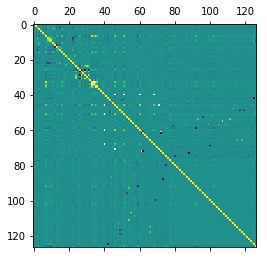

In [5]:
plt.matshow(merged.corr())

In [6]:
'''Untuk menganalisis variabel kategori, kami akan membuat tiga fungsi kustom.
Dua fungsi pertama menampilkan label bar dalam skala absolut dan relatif. Dan yang ketiga menciptakan dataframe absolut dan relatif dan juga menghasilkan abs dan frekuensi relatif plot untuk setiap variabel.'''

''' #1.Fungsi untuk menampilkan nilai absolut'''
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.yticks([])
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
    
'''#2.Fungsi untuk menampilkan level bar secara relatif'''
def pct_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.yticks([])   
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 14, color = 'black')
         
'''#3.Fungsi untuk membuat dataframe frekuensi absolut dan relatif dari setiap variabel. Dan plot frekuensi absolut dan relatif.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    # Will be multiplied by 100 and rounded to 2 decimal points for percentage
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2) 
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    # This portion plots absolute frequency with bar labeled.
    ax =  absolute_frequency.plot.bar()
    plt.title('Absolute Frequency of %s' %variable.name) # Prints variable name as title in matplotlib
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar()
    plt.title('Relative Frequency of %s' %variable.name)
    pct_bar_labels()
    plt.show()
    print('Absolute & Relative Frequency of',variable.name,':')
    return display(df)

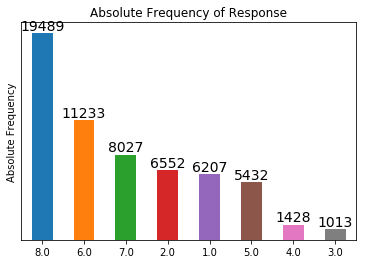

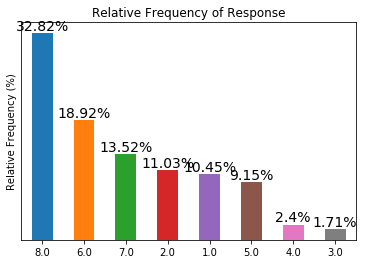

Absolute & Relative Frequency of Response :


,Absolute Frequency,Relative Frequency(%)
8.0,19489,32.82
6.0,11233,18.92
7.0,8027,13.52
2.0,6552,11.03
1.0,6207,10.45
5.0,5432,9.15
4.0,1428,2.40
3.0,1013,1.71


In [7]:
absolute_and_relative_freq(merged.Response)

In [8]:

'''Untuk menganalisis variabel numerik, kita akan membuat dua fungsi kustom.
Yang pertama akan menghitung statistik ringkasan dan plot histogram untuk setiap variabel numerik.
Dan fungsi kedua akan memplot plot kepadatan kernel dan menghitung skewness untuk setiap variabel numerik.''' 

'''#1.Summary statistics with histogram'''
def summary_stats_and_hist(variable):
    global ax
    stats = variable.describe()
    ax = variable.plot.hist()
    plt.xlabel('%s' %variable.name)
    plt.title('Distribution of %s with Histogram' %variable.name)
    abs_bar_labels()
    print('Summary Statistics of', variable.name, ':')
    return display(stats)

'''#2.Density plot with skewness(kecondongan).'''
def density_plot_and_skewness(variable):
    variable.plot.hist(density = True)
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name)
    plt.title('Distribution of %s with Density Plot & Histogram' %variable.name)
    print('Skewness of ', variable.name, ':')
    skewness = variable.skew()
    return display(skewness)


In [9]:
display(merged.Product_Info_2.head(3))

0    D3
1    A1
2    E1
Name: Product_Info_2, dtype: object

D    49779
A    22823
E     3711
B     1531
C     1302
Name: Product_Info_2, dtype: int64

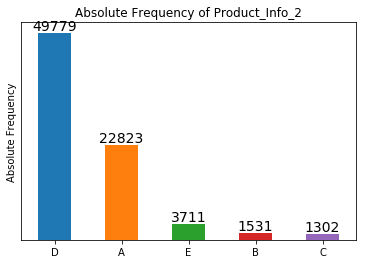

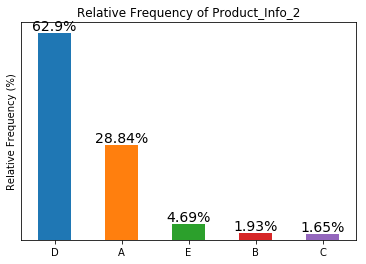

Absolute & Relative Frequency of Product_Info_2 :


,Absolute Frequency,Relative Frequency(%)
D,49779,62.90
A,22823,28.84
E,3711,4.69
B,1531,1.93
C,1302,1.65


In [10]:
merged.Product_Info_2 = merged.Product_Info_2.apply( lambda x : x[0])
display(merged.Product_Info_2.value_counts())

'''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
absolute_and_relative_freq(merged.Product_Info_2)


In [11]:
merged.isna().sum()

Id                         0
Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         22
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       8916
Employment_Info_5          0
Employment_Info_6      14641
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    33501
                       ...  
Medical_Keyword_20         0
Medical_Keyword_21         0
Medical_Keyword_22         0
Medical_Keywor

In [12]:
for f in merged.columns:
    if f == "Response": continue
    if merged[f].dtype == 'float64' and merged[f].isna().sum() != 0:
        merged[f].fillna(merged[f].mean(), inplace=True)
    elif merged[f].isna().sum() != 0:
        merged[f].fillna(merged[f].median(), inplace=True)

In [13]:
merged.isna().sum()

Id                         0
Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1          0
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4          0
Employment_Info_5          0
Employment_Info_6          0
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5        0
                       ...  
Medical_Keyword_20         0
Medical_Keyword_21         0
Medical_Keyword_22         0
Medical_Keywor

In [14]:
display(train.shape)
display(test.shape)
merged.head(10)

(59381, 128)

(19765, 127)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8.0
1,5,1,A,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4.0
2,6,1,E,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8.0
3,7,1,D,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8.0
4,8,1,D,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8.0
5,10,1,D,26,0.230769,3,1,1,0.507463,0.836364,...,0,0,0,0,0,0,0,0,0,8.0
6,11,1,A,10,0.166194,2,3,1,0.373134,0.581818,...,0,0,0,0,0,0,0,0,0,8.0
7,14,1,D,26,0.076923,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,1.0
8,15,1,D,26,0.230769,2,3,1,0.522388,0.618182,...,0,0,0,0,0,0,0,0,0,8.0
9,16,1,E,21,0.076923,2,3,1,0.552239,0.600000,...,0,0,0,0,0,0,0,0,0,1.0


In [15]:
for f in merged.columns:
    if merged[f].dtypes == 'float64':
        merged[f] = merged[f].dropna().astype('int')
    elif merged[f].dtypes == 'object':
        merged[f] = merged[f].astype('category')
        
display(merged.dtypes)

Id                        int64
Product_Info_1            int64
Product_Info_2         category
Product_Info_3            int64
Product_Info_4            int64
Product_Info_5            int64
Product_Info_6            int64
Product_Info_7            int64
Ins_Age                   int64
Ht                        int64
Wt                        int64
BMI                       int64
Employment_Info_1         int64
Employment_Info_2         int64
Employment_Info_3         int64
Employment_Info_4         int64
Employment_Info_5         int64
Employment_Info_6         int64
InsuredInfo_1             int64
InsuredInfo_2             int64
InsuredInfo_3             int64
InsuredInfo_4             int64
InsuredInfo_5             int64
InsuredInfo_6             int64
InsuredInfo_7             int64
Insurance_History_1       int64
Insurance_History_2       int64
Insurance_History_3       int64
Insurance_History_4       int64
Insurance_History_5       int64
                         ...   
Medical_

In [16]:
'''Convert categorical data into numeric to feed our machine learning model.'''
merged = pd.get_dummies(merged)

"""Let's visualize the updated dataset."""
display(merged.head(10))

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_A,Product_Info_2_B,Product_Info_2_C,Product_Info_2_D,Product_Info_2_E
0,2,1,10,0,2,1,1,0,0,0,...,0,0,0,0,8,0,0,0,1,0
1,5,1,26,0,2,3,1,0,0,0,...,0,0,0,0,4,1,0,0,0,0
2,6,1,26,0,2,3,1,0,0,0,...,0,0,0,0,8,0,0,0,0,1
3,7,1,10,0,2,3,1,0,0,0,...,0,0,0,0,8,0,0,0,1,0
4,8,1,26,0,2,3,1,0,0,0,...,0,0,0,0,8,0,0,0,1,0
5,10,1,26,0,3,1,1,0,0,0,...,0,0,0,0,8,0,0,0,1,0
6,11,1,10,0,2,3,1,0,0,0,...,0,0,0,0,8,1,0,0,0,0
7,14,1,26,0,2,3,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,15,1,26,0,2,3,1,0,0,0,...,0,0,0,0,8,0,0,0,1,0
9,16,1,21,0,2,3,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
'''Set a seed for reproducibility'''
seed = 17

"""Let's split the train and test set to feed machine learning algorithm."""
df_train = merged.iloc[:59381, :]
df_test  = merged.iloc[59381:, :]

'''Drop passengerid from train set and Survived from test set.'''
df_train = df_train.drop(columns = ['Id'], axis = 1)
df_test = df_test.drop(columns = ['Response'], axis = 1)

'''Extract data sets as input and output for machine learning models.'''
X_train = df_train.drop(columns = ['Response'], axis = 1) # Input matrix as pandas dataframe (dim:891*47).
y_train = df_train['Response'] #Output vector as pandas series (dim:891*1)

"""Extract test set"""
X_test  = df_test.drop("Id", axis = 1).copy()

'''See the dimensions of input and output data set.'''
display(X_train.shape, X_test.shape, y_train.shape)

(59381, 130)

(19765, 130)

(59381,)

In [18]:
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

display(train_accuracy(gnb))

36.48

In [20]:
'''Submission with the most accurate random forest classifier.'''
submission = pd.DataFrame({
        "Id": test["Id"],
        "Response": gnb.predict(X_test)})
submission.to_csv('submission_gnb.csv', index = False)